In [381]:
# Vasavi Bondapalli
# Z1915865

In [400]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot
from sklearn.feature_selection import chi2
from sklearn import metrics
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.linear_model import Lasso, LogisticRegression
import numpy as np
import pandas as pd
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [401]:
# 1.
# Which features are relevant for the prediction task?  
#Select top 10 features based on your understanding. 
#Show visualizations or statistics to support your selection. [2 0 Marks] 

In [402]:
from ssl import ALERT_DESCRIPTION_ACCESS_DENIED
from urllib.request import urlopen

data = urlopen("http://kdd.ics.uci.edu/databases/tic/dictionary.txt")
data=data.readlines()
data=data[3:] # eliminate the first few lines
#discription
i = 86
codes = {}
for line in data:
    if i == 0:
        break
    thisline=str(line)[2:] # start processing from the integer
    
    words = thisline.split(' ')
    
    n = words[1]
    
    d = ' '.join(words[2:])
    
    codes[int(words[0])] = {'name': n}
  
    i -= 1
    


print(codes)


{1: {'name': 'MOSTYPE'}, 2: {'name': 'MAANTHUI'}, 3: {'name': 'MGEMOMV'}, 4: {'name': 'MGEMLEEF'}, 5: {'name': 'MOSHOOFD'}, 6: {'name': 'MGODRK'}, 7: {'name': 'MGODPR'}, 8: {'name': 'MGODOV'}, 9: {'name': 'MGODGE'}, 10: {'name': 'MRELGE'}, 11: {'name': 'MRELSA'}, 12: {'name': 'MRELOV'}, 13: {'name': 'MFALLEEN'}, 14: {'name': 'MFGEKIND'}, 15: {'name': 'MFWEKIND'}, 16: {'name': 'MOPLHOOG'}, 17: {'name': 'MOPLMIDD'}, 18: {'name': 'MOPLLAAG'}, 19: {'name': 'MBERHOOG'}, 20: {'name': 'MBERZELF'}, 21: {'name': 'MBERBOER'}, 22: {'name': 'MBERMIDD'}, 23: {'name': 'MBERARBG'}, 24: {'name': 'MBERARBO'}, 25: {'name': 'MSKA'}, 26: {'name': 'MSKB1'}, 27: {'name': 'MSKB2'}, 28: {'name': 'MSKC'}, 29: {'name': 'MSKD'}, 30: {'name': 'MHHUUR'}, 31: {'name': 'MHKOOP'}, 32: {'name': 'MAUT1'}, 33: {'name': 'MAUT2'}, 34: {'name': 'MAUT0'}, 35: {'name': 'MZFONDS'}, 36: {'name': 'MZPART'}, 37: {'name': 'MINKM30'}, 38: {'name': 'MINK3045'}, 39: {'name': 'MINK4575'}, 40: {'name': 'MINK7512'}, 41: {'name': 'MINK1

In [441]:
col_names=[]
for i in range(1,87):
    col_names.append(i)
train=pd.read_table('ticdata2000.txt',names=col_names)
test=pd.read_table('ticeval2000.txt')
target=pd.read_table("tictgts2000.txt")

In [442]:
cols1=[]
cols1=pd.DataFrame.from_dict({(i): codes[i] 
                           for i in codes.keys() 
                           #for j in user_dict[i].keys()
                       },orient='index')
cols2=list(cols1.name)

In [443]:
train.columns=cols2

In [444]:
train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [445]:
y_train=train.iloc[: , -1]
x_train = train.iloc[: , :-1]

In [446]:
# Top 10 Features using kBest
from sklearn.feature_selection import SelectKBest, chi2

KBest = SelectKBest(chi2, k=10).fit(x_train, y_train) 
f = KBest.get_support(1)
top10 = train[train.columns[f]]

In [447]:
top10

,MOSTYPE,MOPLHOOG,MHHUUR,MHKOOP,PPERSAUT,PBRAND,PPLEZIER,PBYSTAND,APERSAUT,APLEZIER
0,33,1,1,8,6,5,0,0,1,0
1,37,0,2,7,0,2,0,0,0,0
2,37,0,7,2,6,2,0,0,1,0
3,9,3,5,4,6,2,0,0,1,0
4,40,5,4,5,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5817,36,2,9,0,6,3,0,0,1,0
5818,35,0,3,6,0,5,0,0,0,0
5819,33,0,7,2,6,4,0,0,1,0
5820,34,0,2,7,6,0,0,0,1,0


In [448]:
top10.columns

Index(['MOSTYPE', 'MOPLHOOG', 'MHHUUR', 'MHKOOP', 'PPERSAUT', 'PBRAND',
       'PPLEZIER', 'PBYSTAND', 'APERSAUT', 'APLEZIER'],
      dtype='object')

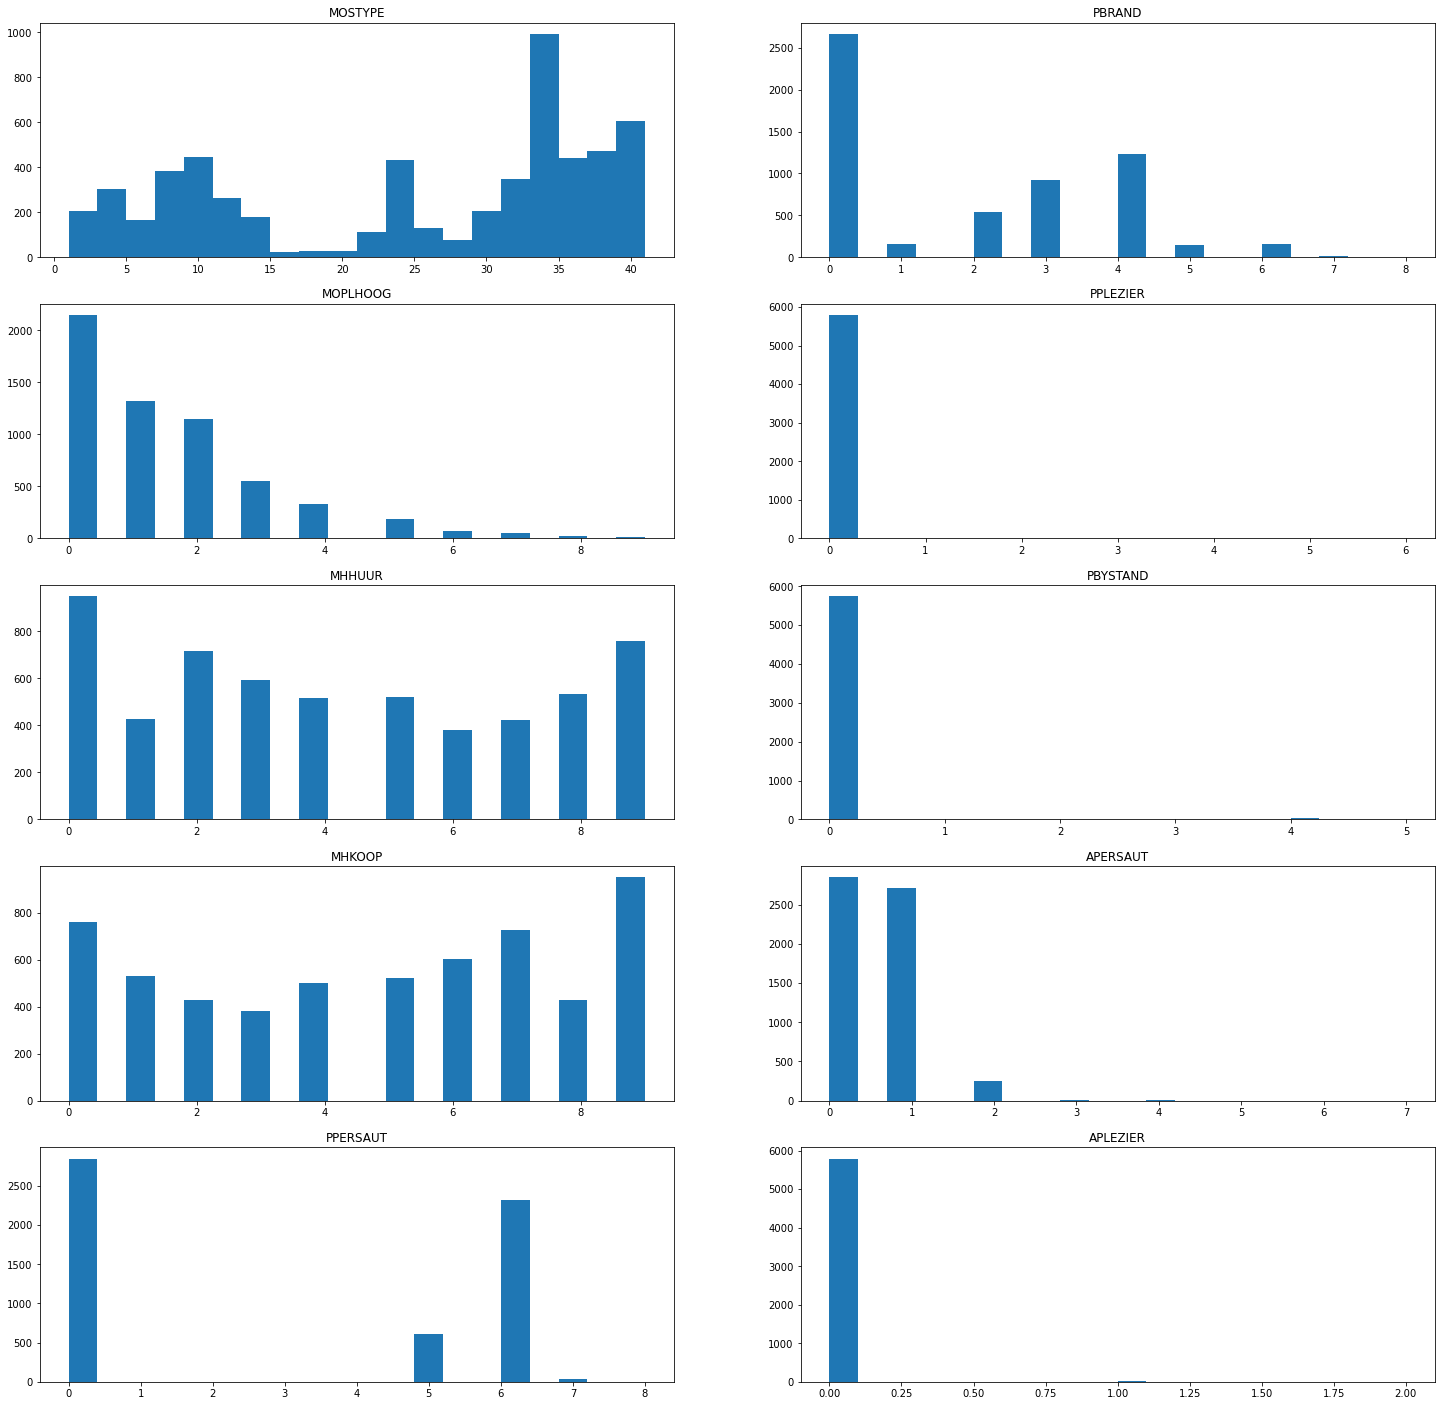

In [449]:
fig,ax = plt.subplots(5,2,figsize=(25,25))

num = 0
for j in range(2):
    for i in range(len(ax)):
        k=i+5*j
        ax[i][j].hist(top10.iloc[:,k],bins=20)
        ax[i][j].set_title(top10.columns[k])
        num=num+1
        
#comments too

In [450]:
# 2. 
#  Train a Logistic Regression (LogReg) model with L1 regularization. 
# Find the best model using grid search on C values. 
# Analyze which features have nonzero coefficients for the best model. 
# Are they in synch with your selected features from question 1? [30 Marks]

In [451]:
#Logistic regression with L1 Regularization

from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01,0.1,1,2,3]} # Grid Search Parameter
log_reg = LogisticRegression(penalty='l1') 
grid_search = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid, cv=5 , n_jobs=-1,)
clf=grid_search.fit(x_train, y_train) # fit the model
print(clf.best_params_) # show best value of C we found
print(clf.best_score_)

{'C': 0.01}
0.9402268336209312


In [452]:
clf.best_estimator_.coef_

array([[-0.01675831,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.03479546,  0.        ,
         0.        , -0.00773786,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.07331453,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.15931638,
        -0.10529017,  0.        ,  0.        ,  0.        , -0.1481739 ,
        -0.13716543, -0.01725729,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.15485753,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.03420858,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [453]:
log_l1=(clf.best_estimator_.coef_)
#print(type(log_l1))
x=[]
d=log_l1[0]
#print(range(len(d)))
for i in range(len(d)):
    if d[i]!=0:
        x.append(i+1)
print("Features using logreg with L1 regularization are :",x)

Features using logreg with L1 regularization are : [1, 9, 12, 18, 30, 31, 35, 36, 37, 47, 59]


In [454]:
## Only 5 features from Q2(logreg with L1 regularization) are in synch with Q1(KBest) ,
## those are : 1, 30, 31 ,47 and 59 
## Feature names are: Customer Subtype, Rented Houses, Home owners, Contribution car policies, 
#                     Contribution fire policies

In [455]:
#clf.get_params().values()

In [456]:
pred=clf.predict(test) # predict Results
#cm = confusion_matrix(target,pred) # get confusion matrix 
# calculate score
score = fbeta_score(target, pred, average='weighted', beta=0.5) # arguments are actual answers and predicted answers
print('F-Measure: %.3f' % score)

F-Measure: 0.895


In [457]:
#2LogisticReg with L1
print ("Accuracy ON TEST SET :", metrics.accuracy_score(target, clf.predict(test)))

Accuracy ON TEST SET : 0.9404851212803201


In [458]:
#3. Generate polynomial features and use LogReg again with L1. See if accuracy increase. 

In [459]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree = 2) # Creating object with Ploynomial degree 2.
lr = LogisticRegression(penalty='l1',C=0.01,solver='liblinear') 
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)]) # first convert the features in polynomial than apply logistic Regression
pipe.fit(x_train, y_train) 


Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('logistic_regression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [460]:
pred=pipe.predict(test)
#cm = confusion_matrix(target,pred)
# calculate score
score = fbeta_score(target, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.897


In [461]:
#2LogisticReg with L1
print ("Accuracy ON TEST SET :", metrics.accuracy_score(target, clf.predict(test)))

Accuracy ON TEST SET : 0.9404851212803201


In [462]:
#3Polynomial
print ("Accuracy ON TEST SET :", metrics.accuracy_score(target, pipe.predict(test)))

Accuracy ON TEST SET : 0.9404851212803201


In [463]:
# The accuracy remains same 

In [464]:
# 4. Train a Decision Tree and see if you can get a better result. 
# Show feature importance from the decision tree. 
# Are they in synch with the features from Q1 and Q2? 

In [465]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

In [466]:
pred=tree.predict(test) # predict Results
#cm = confusion_matrix(target,pred) # get confusion matrix 
# calculate score
score = fbeta_score(target, pred, average='weighted', beta=0.5)
print('F-Score: %.3f' % score)

F-Score: 0.900


In [467]:
tree.feature_importances_

array([0.15076301, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05561635, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0714191 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06196093,
       0.        , 0.        , 0.        , 0.08068586, 0.        ,
       0.        , 0.32246037, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15355055, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [468]:
decision_tree=(tree.feature_importances_)
x=[]
d=decision_tree
for i in range(len(d)):
    if d[i]!=0:
        x.append(i+1)
print("Features using Decision Tree are :",x)

Features using Decision Tree are : [1, 18, 24, 40, 44, 47, 59, 82]


In [469]:
##Comparing the features from Q4 with Q1 , only 3 features are in synch with Q1 features 
## and those features are:47, 59 and 82 namely : Contribution car policies, Contribution fire policies 
##                                               and No. of boat policies
##Comparing the features from Q4 with Q2 , only 3 features are in synch with Q2 features 
## and those features are:18, 47 and 59 namely : Lower Level education, Contribution car policies 
##                                              and Contribution fire policies

In [470]:
#2LogisticReg with L1
print ("Accuracy ON TEST SET with logreg L1 only :", metrics.accuracy_score(target, clf.predict(test)))

Accuracy ON TEST SET with logreg L1 only : 0.9404851212803201


In [471]:
#3Polynomial
print ("Accuracy ON TEST SET with polynomial and L1 :", metrics.accuracy_score(target, pipe.predict(test)))

Accuracy ON TEST SET with polynomial and L1 : 0.9404851212803201


In [472]:
#3Decision Tree Classifier
print ("Accuracy ON TEST SET with decision tree classifier:", metrics.accuracy_score(target, tree.predict(test)))

Accuracy ON TEST SET with decision tree classifier: 0.9389847461865466
